# Alessio Reitano - 0001005384

In [982]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from string import punctuation
from wordcloud import WordCloud,STOPWORDS
from sklearn.preprocessing import MultiLabelBinarizer

# Imports for clustering and plot
from plot_silhouette import plot_silhouette
from plot_clusters import plot_clusters
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

# Variables
file_name = 'movies_tv_shows.csv'
separator = ','
random_state = 43

# Directives
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(random_state)
plt.style.use('ggplot')

In [983]:
#Loading the dataset
df = pd.read_csv(file_name, sep=separator, encoding = "ISO-8859-1") #dataset not in utf-8

In [984]:
df.shape

(12035, 13)

In [985]:
df.columns

Index(['Sl.No', 'Title', 'Description', 'Genres', 'Cast', 'Director',
       'Production Country', 'Added On', 'Year', 'Text8', 'Duration(in Mins)',
       'Season', 'Rating'],
      dtype='object')

In [986]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12035 entries, 0 to 12034
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl.No               12034 non-null  float64
 1   Title               12035 non-null  object 
 2   Description         12035 non-null  object 
 3   Genres              12035 non-null  object 
 4   Cast                10533 non-null  object 
 5   Director            9892 non-null   object 
 6   Production Country  150 non-null    object 
 7   Added On            12035 non-null  object 
 8   Year                12034 non-null  float64
 9   Text8               11737 non-null  object 
 10  Duration(in Mins)   10136 non-null  object 
 11  Season              1900 non-null   object 
 12  Rating              937 non-null    object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [987]:
df.describe()

,Sl.No,Year
count,12034.000000,12034.000000
mean,6017.500000,2006.731677
std,3474.060904,22.160818
min,1.000000,1920.000000
25%,3009.250000,2006.000000
50%,6017.500000,2016.000000
75%,9025.750000,2020.000000
max,12034.000000,2022.000000


In [988]:
print('Total duplicate values: {}'.format(df.duplicated().sum()))

Total duplicate values: 0


In [989]:
df.head()

,Sl.No,Title,Description,Genres,Cast,Director,Production Country,Added On,Year,Text8,Duration(in Mins),Season,Rating
0,1.0,An American Ghost Story,Paul Anderson (Stephen Twardokus) and his girl...,Horror,"Stephen Twardokus, Jon Gale, Liesel Kopp, Wend...",Derek Cole,NaN,"June 19, 2022",2012.0,18+,90,NaN,NaN
1,2.0,Back Door to Heaven,"A young kid, who starts out stealing small thi...","Action, Drama","Wallace Ford, Stuart Erwin",William K. Howard,NaN,"June 19, 2022",1939.0,7+,84,NaN,NaN
2,3.0,Big Timers,A wealthy young society man is dating a beauti...,"Arts, Entertainment, and Culture, Comedy","Stepin Fetchit, Francine Everett",Bud Pollard,NaN,"June 19, 2022",1945.0,7+,36,NaN,NaN
3,4.0,Brand of the Devil,Jolley is the leader of the Devil's Brand gang...,Western,"Dave O'Brien, James Newill",Harry L. Fraser,NaN,"June 19, 2022",1944.0,13+,57,NaN,NaN
4,5.0,Come As You Are,Three young men with disabilities (Grant Rosen...,"Comedy, Drama, Romance","Grant Rosenmeyer, Hayden Szeto, Ravi Patel, Ga...",Richard Wong,NaN,"June 19, 2022",2019.0,18+,107,NaN,NaN


In [990]:
# Drop Genres and replace
df.drop(df[df['Genres'] == 'Genres'].index, inplace = True)
df['Genres'] = df['Genres'].str.replace('Arts, Entertainment, and Culture', 'Arts Entertainment and Culture')

In [991]:
# Drop the value duplicate for Title
df1 = df1.drop_duplicates(["Title"])
print("Duplicates removed")
df1.shape

Duplicates removed


(7712, 8)

In [992]:
df1 = df1.drop_duplicates(["Description"])
print("Duplicates removed")
df1.shape

Duplicates removed


(7712, 8)

In [993]:
df1.nunique()

Title                7712
Description          7712
Genres                512
Cast                 7466
Director             6064
Year                  102
Rating                  7
Duration(in Mins)     197
dtype: int64

In [994]:
df1.isna().sum()

Title                0
Description          0
Genres               0
Cast                 0
Director             0
Year                 0
Rating               0
Duration(in Mins)    0
dtype: int64

In [995]:
# Drop null values
df1.dropna(inplace=True)

In [996]:
df1.rename(columns={'Text8':'Rating'},inplace=True)

In [997]:
df1.shape

(7712, 8)

In [998]:
# Convert the Title column to lowercase
df1['Title'] = df1['Title'].str.lower()

In [999]:
# Convert the Description column to lowercase
df1['Description'] = df1['Description'].str.lower()

In [1000]:
# Convert the Genres column to lowercase
df1['Genres'] = df1['Genres'].str.lower()

In [1001]:
# Convert the Cast column to lowercase
df1['Cast'] = df1['Cast'].str.lower()

In [1002]:
# Convert the Director column to lowercase
df1['Director'] = df1['Director'].str.lower()

In [1003]:
df1.head()

,Title,Description,Genres,Cast,Director,Year,Rating,Duration(in Mins)
0,american ghost stori,paul anderson stephen twardoku girlfriend stel...,horror,"stephen twardokus,jon gale,liesel kopp,wendy h...",derek cole,2012.0,18,90
1,back door heaven,young kid start steal small thing order fit cr...,"action,drama","wallace ford,stuart erwin",william k. howard,1939.0,7,84
2,big timer,wealthi young societi man date beauti young wo...,"arts entertainment and culture,comedy","stepin fetchit,francine everett",bud pollard,1945.0,7,36
3,brand devil,jolley leader devil brand gang rustler molli d...,western,"dave obrien,james newill",harry l. fraser,1944.0,13,57
4,come,three young men disabl grant rosenmey hayden s...,"comedy,drama,romance","grant rosenmeyer,hayden szeto,ravi patel,gabou...",richard wong,2019.0,18,107


In [1004]:
df1.dtypes

Title                 object
Description           object
Genres                object
Cast                  object
Director              object
Year                 float64
Rating                 int64
Duration(in Mins)     object
dtype: object

In [1005]:
rating_count = df1["Rating"].value_counts()
rating_count 

 13    2400
 18    2284
 16    1444
 0      574
-1      538
 7      470
 17       2
Name: Rating, dtype: int64

In [1006]:
def mergeRating(i):
    if i in ["G", "ALL", "ALL_AGES"]:
        return 0
    elif i in ["7+"]:
        return 7
    elif i in ["13+", "PG-13"]:
        return 13
    elif i in ["16+", "16"]:
        return 16
    elif i in ["NC-17"]:
        return 17
    elif i in ["18+", "AGES_18_", "R"]:
        return 18
    elif i in ["NR", 'UNRATED', 'NOT_RATE', "PG"]:
        return -1
    return i

df1["Rating"] = df1["Rating"].apply( mergeRating )

df1["Rating"].unique()

array([18,  7, 13, -1,  0, 16, 17])

<AxesSubplot:xlabel='Rating', ylabel='count'>

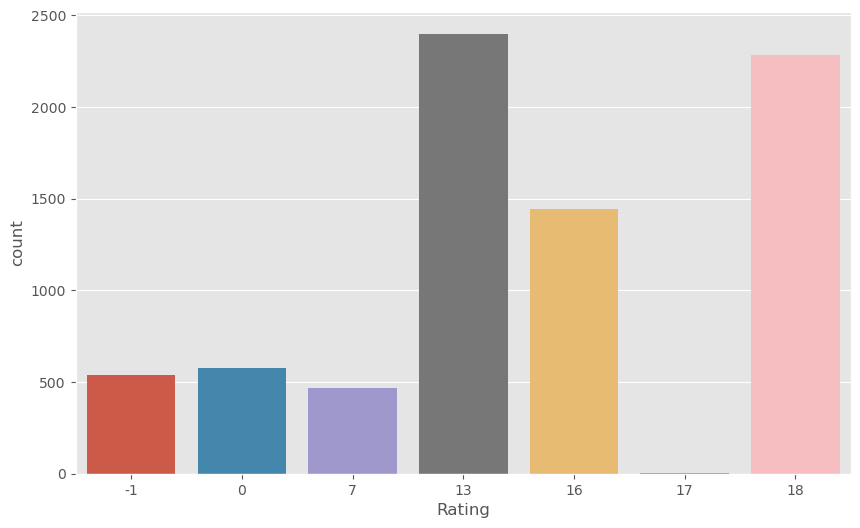

In [1007]:
sns.countplot(data=df1, x='Rating') 

In [1008]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

#apply the function
df1['Description'] = df1['Description'].apply(remove_punctuation)
df1['Title'] = df1['Title'].apply(remove_punctuation)

In [1009]:
import string

def remove_punctuation_except_comma_and_period(input_text):
    punctuation_except_comma_period = ''.join([p for p in string.punctuation if p not in [',', '.']])
    return input_text.translate(str.maketrans('', '', punctuation_except_comma_period))


df1['Cast'] = df1['Cast'].apply(remove_punctuation_except_comma_and_period)

In [1010]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text
    
    tokens = word_tokenize(text)
    
    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    #Stemmer
    
    stemmer = PorterStemmer()
    
    stemmered_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmered_tokens]
    
    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function

df1['Description'] = df1['Description'].apply(preprocess_text)
df1['Title'] = df1['Title'].apply(preprocess_text)

df1['Genres'] = df1['Genres'].str.strip()
df1['Genres'] = df1['Genres'].str.replace(" , ",",")
df1['Genres'] = df1['Genres'].str.replace(", ",",")
df1['Genres'] = df1['Genres'].str.replace(" ,",",")

df1['Director'] = df1['Director'].str.strip()
df1['Director'] = df1['Director'].str.replace(" , ",",")
df1['Director'] = df1['Director'].str.replace(", ",",")
df1['Director'] = df1['Director'].str.replace(" ,",",")

df1['Cast'] = df1['Cast'].str.strip()
df1['Cast'] = df1['Cast'].str.replace(" , ",",")
df1['Cast'] = df1['Cast'].str.replace(", ",",")
df1['Cast'] = df1['Cast'].str.replace(" ,",",")

df1.head()

,Title,Description,Genres,Cast,Director,Year,Rating,Duration(in Mins)
0,american ghost stori,paul anderson stephen twardoku girlfriend stel...,horror,"stephen twardokus,jon gale,liesel kopp,wendy h...",derek cole,2012.0,18,90
1,back door heaven,young kid start steal small thing order fit cr...,"action,drama","wallace ford,stuart erwin",william k. howard,1939.0,7,84
2,big timer,wealthi young societi man date beauti young wo...,"arts entertainment and culture,comedy","stepin fetchit,francine everett",bud pollard,1945.0,7,36
3,brand devil,jolley leader devil brand gang rustler molli d...,western,"dave obrien,james newill",harry l. fraser,1944.0,13,57
4,come,three young men disabl grant rosenmey hayden s...,"comedy,drama,romance","grant rosenmeyer,hayden szeto,ravi patel,gabou...",richard wong,2019.0,18,107


In [1011]:
mlb = MultiLabelBinarizer()

genres = pd.DataFrame(mlb.fit_transform(df1['Genres'].str.split(',')),columns = mlb.classes_, index = df1.index)
director = pd.DataFrame(mlb.fit_transform(df1['Director'].str.split(',')),columns = mlb.classes_, index = df1.index)
cast = pd.DataFrame(mlb.fit_transform(df1['Cast'].str.split(',')),columns = mlb.classes_, index = df1.index)
description = pd.DataFrame(mlb.fit_transform(df1['Description'].str.split()), columns = mlb.classes_, index = df1.index)

In [1012]:
def find_top_columns(dataset):
    # Calcola la somma per ogni colonna
    column_sums = dataset.sum(axis=0)
    
    # Crea un dizionario che associa i nomi delle colonne alle somme
    column_dict = {column_name: column_sum for column_name, column_sum in zip(dataset.columns, column_sums)}
    
    # Crea un oggetto Counter per contare le frequenze dei nomi delle colonne
    column_counts = Counter(column_dict)
    
    # Trova i 100 nomi di colonne più frequenti
    top_columns = [column_name for column_name, _ in column_counts.most_common(100)]
    
    # Seleziona le 100 colonne più frequenti e crea una copia del dataset con solo queste colonne
    top_dataset = dataset[top_columns].copy()
    
    # Crea una nuova colonna "altro" con valori 1 se il nome non è tra le 100 colonne più frequenti, altrimenti 0
    top_dataset['Other'] = dataset.apply(lambda row: 1 if row.name not in top_columns else 0, axis=1)
    
    return top_dataset

In [1013]:
cast_top_100 = find_top_columns(cast)

In [1014]:
director_top_100 = find_top_columns(director)

In [1015]:
df2 = pd.concat([df1, description, genres, director_top_100, cast_top_100],axis=1)

In [1016]:
df2

,Title,Description,Genres,Cast,Director,Year,Rating,Duration(in Mins),0,007,...,brahmanandam,chill wills,desmond llewelyn q,donald sutherland,george cleveland,goundamani,jayaprakash,jeff goldblum,kajol,Other
0,american ghost stori,paul anderson stephen twardoku girlfriend stel...,horror,"stephen twardokus,jon gale,liesel kopp,wendy h...",derek cole,2012.0,18,90,0,0,...,0,0,0,0,0,0,0,0,0,1
1,back door heaven,young kid start steal small thing order fit cr...,"action,drama","wallace ford,stuart erwin",william k. howard,1939.0,7,84,0,0,...,0,0,0,0,0,0,0,0,0,1
2,big timer,wealthi young societi man date beauti young wo...,"arts entertainment and culture,comedy","stepin fetchit,francine everett",bud pollard,1945.0,7,36,0,0,...,0,0,0,0,0,0,0,0,0,1
3,brand devil,jolley leader devil brand gang rustler molli d...,western,"dave obrien,james newill",harry l. fraser,1944.0,13,57,0,0,...,0,0,0,0,0,0,0,0,0,1
4,come,three young men disabl grant rosenmey hayden s...,"comedy,drama,romance","grant rosenmeyer,hayden szeto,ravi patel,gabou...",richard wong,2019.0,18,107,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12015,yoga ea flight anxieti,reduc stress fli use simpl affect yogaba move ...,"fitness,special interest",annemarie newland,mark knight,2016.0,0,14,0,0,...,0,0,0,0,0,0,0,0,0,1
12016,yoga har chakra energi,sharecar window present carolin shola arewa de...,"faith and spirituality,special interest",caroline shola arewa,mark knight,2014.0,0,18,0,0,...,0,0,0,0,0,0,0,0,0,1
12017,yoga sound medit,session establish prepar practic mind medit le...,"fitness,special interest",annmarie newland,mark knight,2016.0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,1
12023,young lover,talent beauti carol william forrest devast lea...,drama,"sally forrest,keefe brasselle,hugh obrian,eve ...",ida lupino,1949.0,18,86,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1021]:
#Word frequency of Cast
freq_cast = df2['Cast'].str.split(',').explode().str.strip()
print(freq_cast.value_counts()[:20])

roy rogers                           43
gene autry                           35
george gabby hayes                   32
john wayne                           29
champion                             28
prakash raj                          27
annemarie newland                    25
                                     25
anupam kher                          24
nassar                               22
amitabh bachchan                     22
cassandra peterson                   21
rani mukerji                         21
eric roberts                         19
danny trejo                          18
rishi kapoor                         18
eddie izzard                         17
ph.d.                                17
michael madsen                       16
mystery science theater 3000 guys    16
Name: Cast, dtype: int64


In [1023]:
#Word frequency of Genres
freq_genres = df2['Genres'].str.split(',').explode().str.strip()
print(freq_genres.value_counts()[:20])

drama                             3711
comedy                            2146
action                            1638
suspense                          1478
horror                             914
romance                            614
special interest                   571
international                      541
arts entertainment and culture     535
documentary                        502
science fiction                    403
kids                               371
adventure                          321
western                            287
arthouse                           155
animation                          150
fantasy                            108
lgbtq                              103
sports                             102
music videos and concerts           69
Name: Genres, dtype: int64


In [1024]:
df3 = df2.drop(['Genres','Description','Cast','Director'],axis=1)

In [1025]:
df3['Duration(in Mins)']=pd.to_numeric(df3['Duration(in Mins)'])

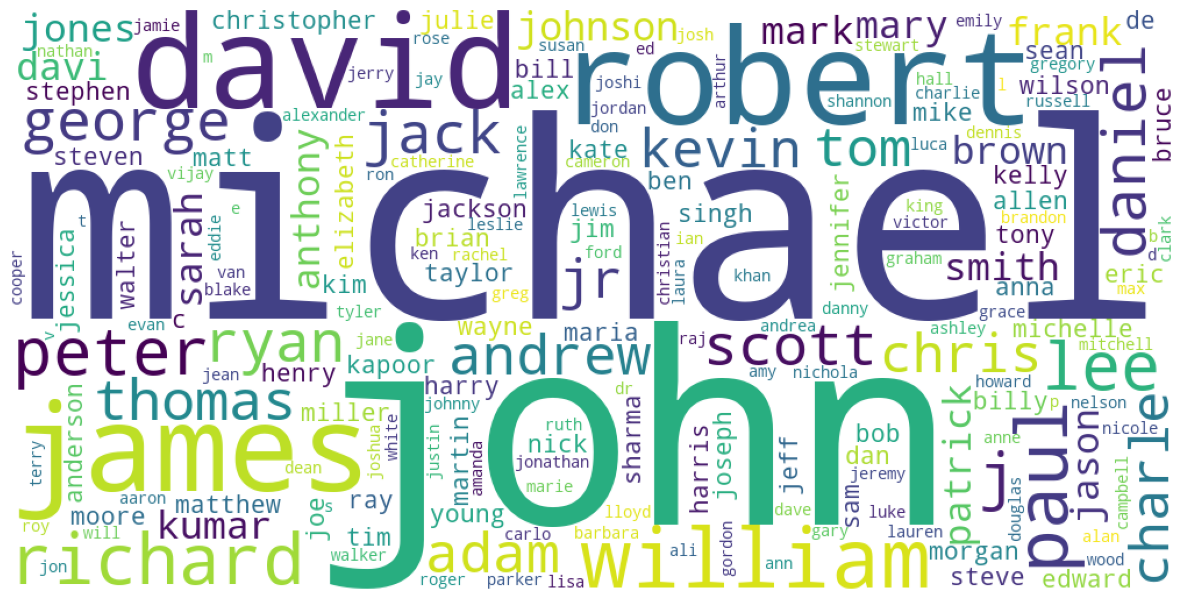

In [1026]:
wordcloud_description = WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df2['Cast']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_description)
plt.axis("off")
plt.show()

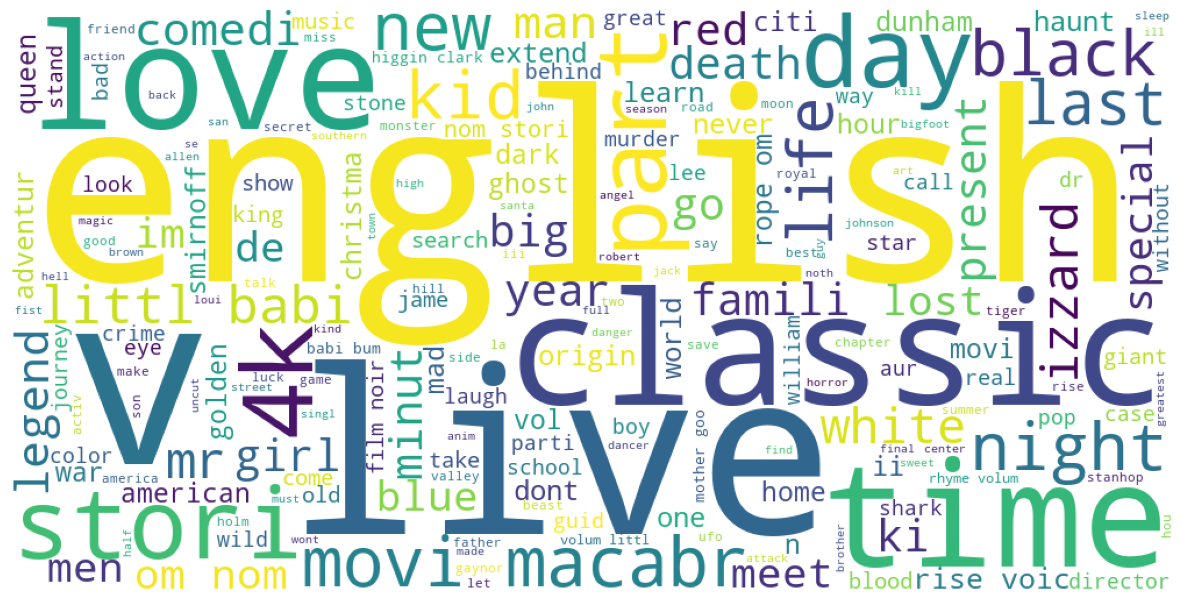

In [1027]:
wordcloud_title = WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df2['Title']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_title)
plt.axis("off")
plt.show()

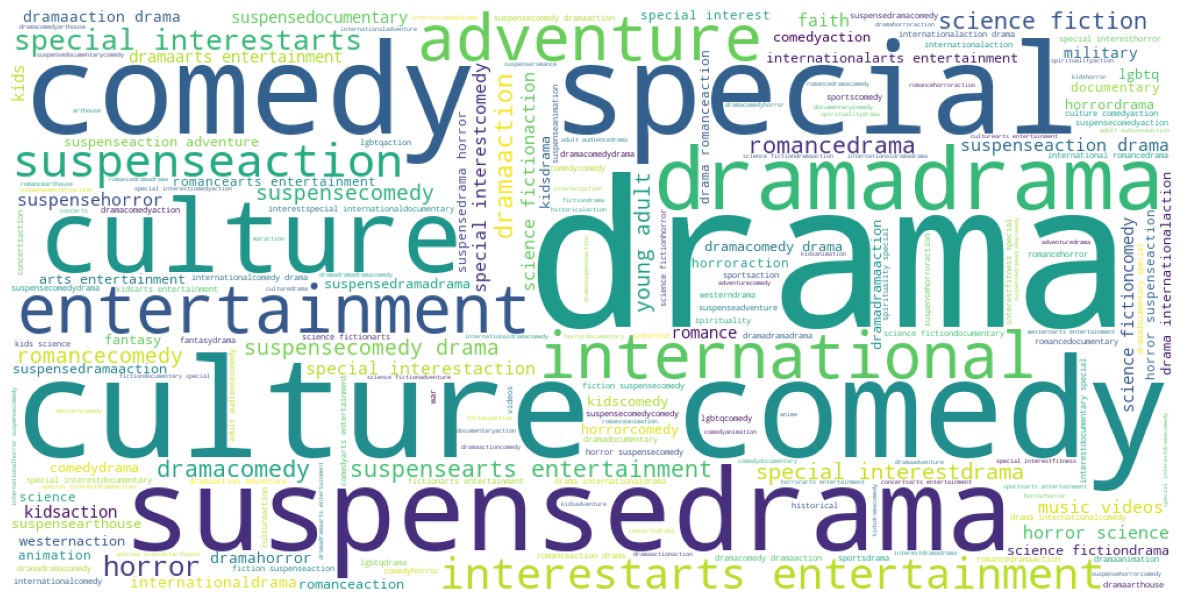

In [1031]:
wordcloud_genres = WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df2['Genres']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_genres)
plt.axis("off")
plt.show()

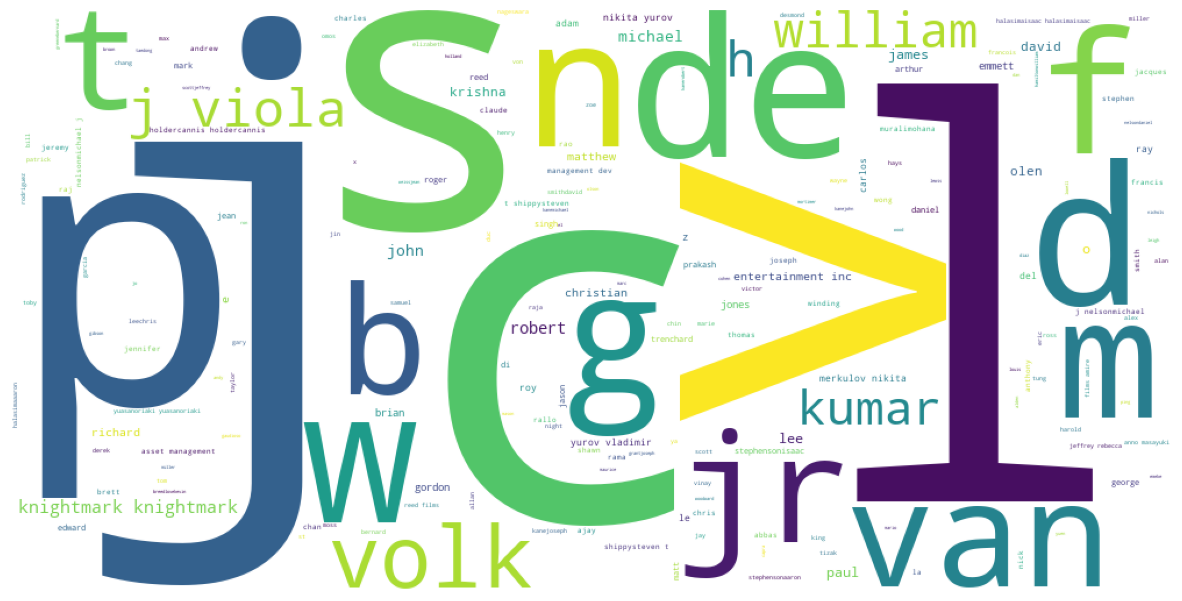

In [1032]:
wordcloud_genres = WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df2['Director']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_genres)
plt.axis("off")
plt.show()

In [128]:
df_p = df3.drop(['Title'],axis=1)
df_p.head()

,Year,Rating,Duration(in Mins),0,007,03yr,1,10,100,1000,...,billy zane,brahmanandam,brian cox,chill wills,christian slater,george cleveland,goundamani,jayaprakash,jeff goldblum,Other
0,2012.0,18,90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1939.0,7,84,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1945.0,7,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1944.0,13,57,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2019.0,18,107,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [129]:
# Range of possible clusters
k_range = range(2,10)

# Distortion and Silhouette Score as measures
distortions = []
silhouette_scores = []

for i in k_range:
    km = KMeans(n_clusters = i,
    init = 'k-means++',
    n_init = 10,
    max_iter = 300,
    random_state = random_state)
    y_km = km.fit_predict(df_p)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_p,y_km))

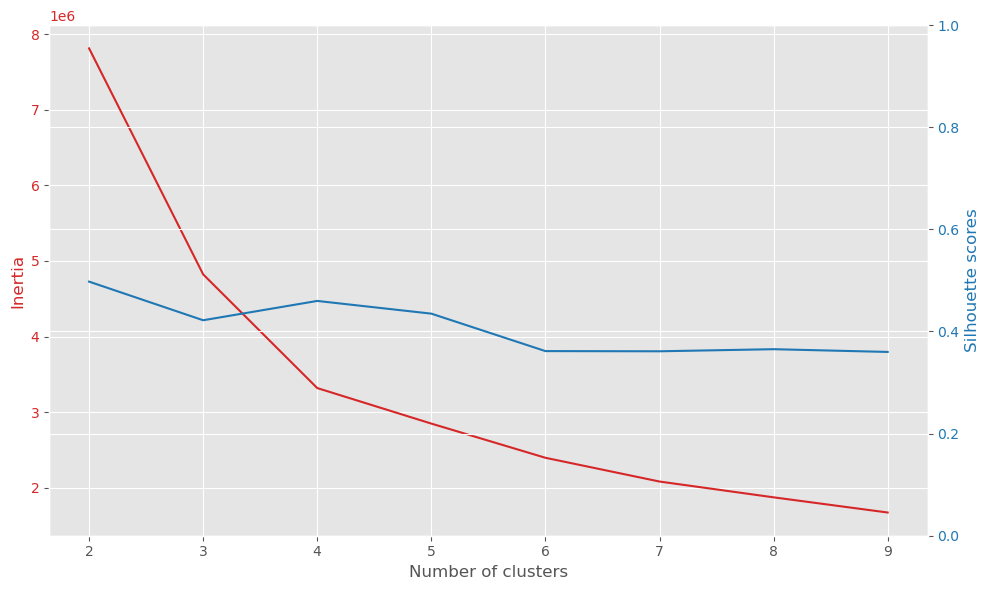

In [130]:
#Plot distortion and silhouette indexes
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [131]:
good_k = 4
km = KMeans(n_clusters=good_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=random_state)
y_km = km.fit_predict(df_p)

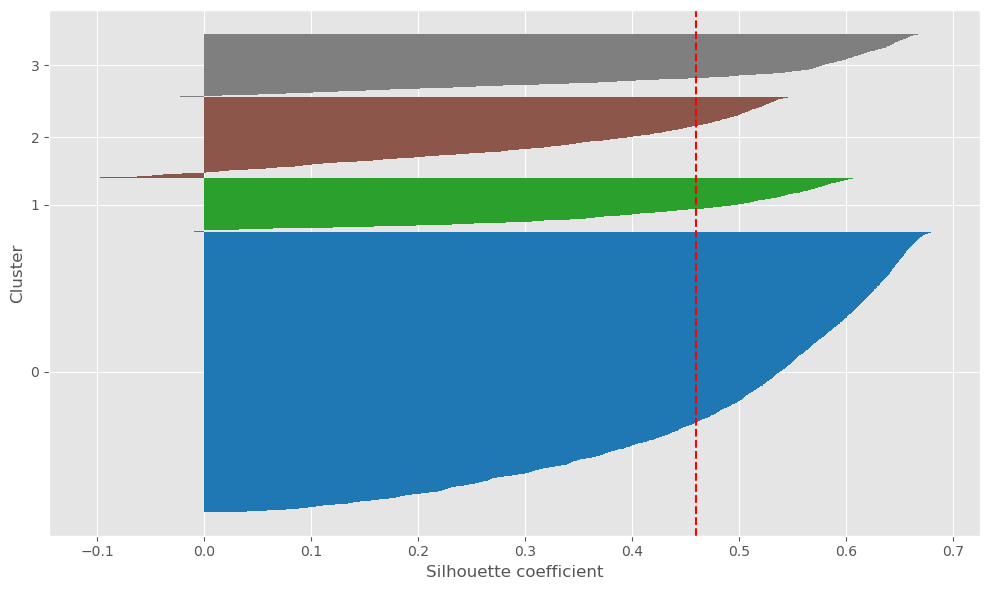

In [132]:
silhouette_vals = silhouette_samples (df_p,y_km, metric = 'euclidean')
plot_silhouette(silhouette_vals,y_km)